In [16]:
import os
import sys
import subprocess
from pathlib import Path

repo_root = subprocess.run(
    ["git", "rev-parse", "--show-toplevel"], capture_output=True, text=True
).stdout.strip()

sys.path.append(repo_root)

In [17]:
import numpy as np

import pickle

from utils import data_reader
import feature_analysis

In [18]:
import importlib

importlib.reload(data_reader)
importlib.reload(feature_analysis)

<module 'feature_analysis' from '/Users/vinhtran/Data/Research/Mark/TNG Galaxies Classification/tng_galaxies_classification/analysis/feature_analysis.py'>

In [19]:
from matplotlib import pyplot as plt
import matplotlib as mpl

mpl.style.use('classic')
mpl.rc('xtick', labelsize=23); mpl.rc('ytick', labelsize=23)
mpl.rc('xtick.major', size=15 , width=2)
mpl.rc('xtick.minor', size=8, width=2, visible=True)
mpl.rc('ytick.major', size=15 , width=2)
mpl.rc('ytick.minor', size=8, width=2, visible=True)
mpl.rc('lines',linewidth=3, markersize=20)
mpl.rc('axes', linewidth=2, labelsize=30, labelpad=2.5)
mpl.rc('legend', fontsize=25, loc='best', frameon=False, numpoints=1)

mpl.rc('font', family='STIXGeneral')
mpl.rc('mathtext', fontset='stix')

In [31]:
data_path = '../../data/'

metadata = data_reader.Metadata(os.path.join(data_path,'metadata.pkl'))
clusters = data_reader.Clusters(os.path.join(data_path,'group_data/reduced_data.0.h5'))
galaxies = data_reader.Galaxies(os.path.join(data_path,'subhalo_data/reduced_data.0.h5'),
                                clusters,metadata.BoxSize/metadata.HubbleParam)

bins = 101

galaxy_statistics = feature_analysis.GalaxyStatistics(galaxies,radial_bins=np.logspace(-2,2,bins))

In [73]:
def show_feature(feature_func,label,positive=False):
    fig, ax = plt.subplots(figsize=(10, 8))

    radial_bin_centers, feature_profile, feature_profile_err = galaxy_statistics.get_feature_profile(feature_func)
    ax.errorbar(radial_bin_centers, feature_profile, yerr=feature_profile_err,
                fmt=' s', markersize=7.5, elinewidth=2, capsize=7.5, capthick=1.5, color='darkcyan')

    feature_bins = np.linspace(
        max(0,np.min(feature_profile-feature_profile_err)) if positive else np.min(feature_profile-feature_profile_err),
        np.max(feature_profile+feature_profile_err),bins
    )
    radial_bin_centers, feature_bin_centers, feature_hist = galaxy_statistics.get_feature_histogram(feature_func,feature_bins)
    feature_hist_log = np.log10(feature_hist)
    feature_hist_log[feature_hist == 0] = 0
    c = ax.pcolor(radial_bin_centers, feature_bin_centers, feature_hist_log,cmap='plasma')

    ax.set_xscale('log')

    ax.set_xlabel(r'$r/R_{200}$')
    ax.set_ylabel(label)

    ax.set_xlim(1e-2, 1e2)
    ax.set_ylim(feature_bins[0], feature_bins[-1])

    plt.tight_layout()
    plt.show()

/var/folders/_n/k8j9__0s4x1b10rq7h7zj1bc0000gq/T/ipykernel_44875/456051516.py:13: RuntimeWarning: divide by zero encountered in log10
  feature_hist_log = np.log10(feature_hist)


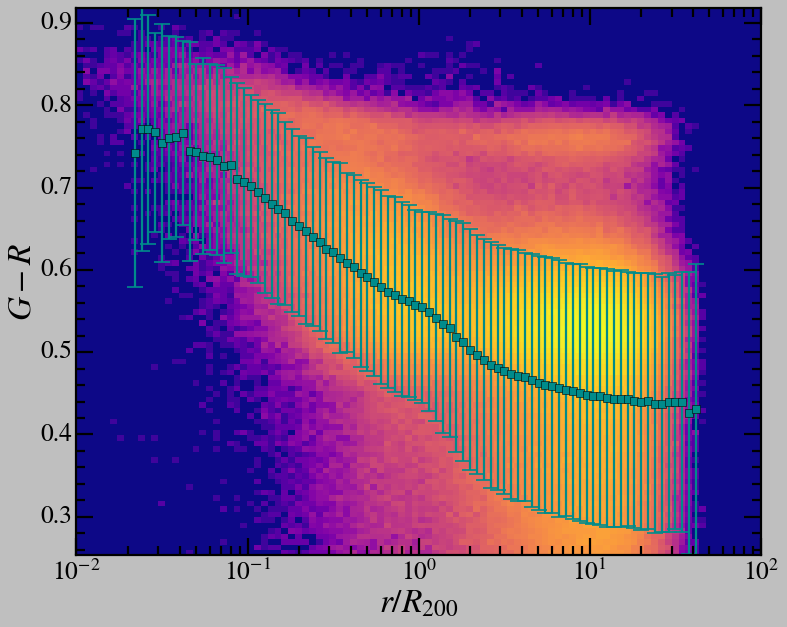

In [74]:
def color_func(galaxy_data):
    Gmag = galaxy_data.SubhaloGmag
    Rmag = galaxy_data.SubhaloRmag
    
    Color = Gmag - Rmag

    return Color

show_feature(color_func, r'$G-R$')

/var/folders/_n/k8j9__0s4x1b10rq7h7zj1bc0000gq/T/ipykernel_44875/456051516.py:13: RuntimeWarning: divide by zero encountered in log10
  feature_hist_log = np.log10(feature_hist)


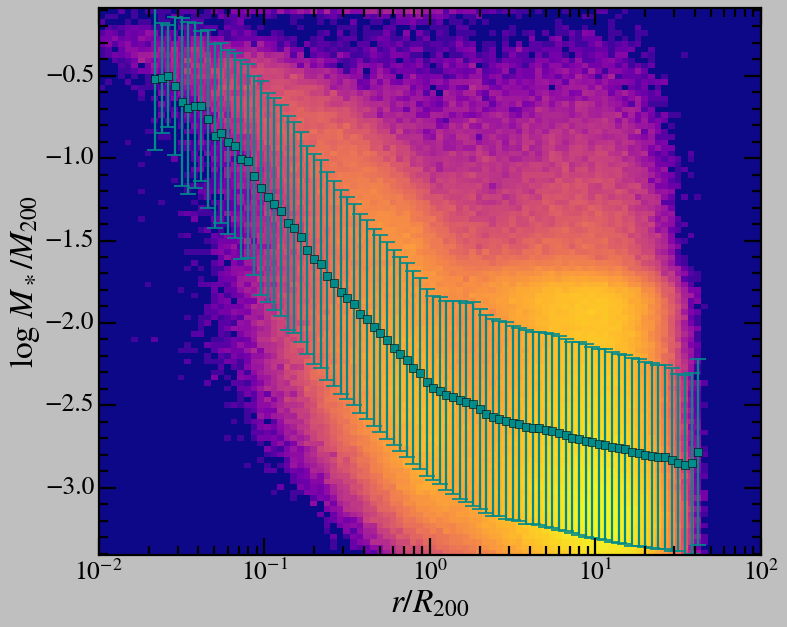

In [102]:
def log_stellar_mass_ratio_func(galaxy_data):
    Mass = galaxy_data.SubhaloMass
    StellarMass = galaxy_data.SubhaloStellarMass

    MassRatio = StellarMass/Mass

    return np.log10(MassRatio)

show_feature(log_stellar_mass_ratio_func, r'log $M_\ast/M_{200}$')

/var/folders/_n/k8j9__0s4x1b10rq7h7zj1bc0000gq/T/ipykernel_44875/456051516.py:13: RuntimeWarning: divide by zero encountered in log10
  feature_hist_log = np.log10(feature_hist)


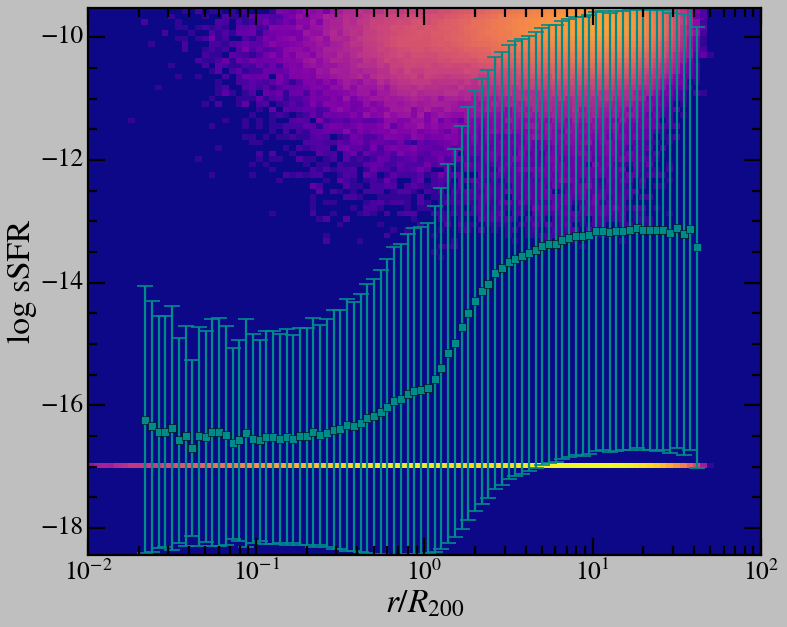

In [90]:
def log_starformation_rate(galaxy_data):
    SFR = galaxy_data.SubhaloSFR
    StellarMass = galaxy_data.SubhaloStellarMass * 10**10

    SSFR = SFR/StellarMass

    zero_SSFR_mask = SSFR <= 0
    SSFR[zero_SSFR_mask] = 1e-17

    return np.log10(SSFR)

show_feature(log_starformation_rate, r'log sSFR')

/var/folders/_n/k8j9__0s4x1b10rq7h7zj1bc0000gq/T/ipykernel_44875/456051516.py:13: RuntimeWarning: divide by zero encountered in log10
  feature_hist_log = np.log10(feature_hist)


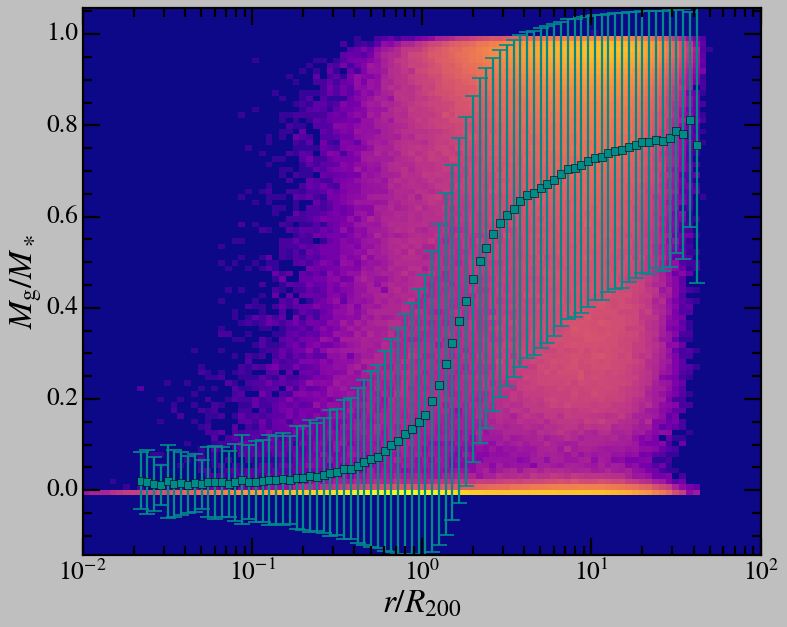

In [99]:
def gas_mass_ratio_func(galaxy_data):
    GasMass = galaxy_data.SubhaloGasMass
    StellarMass = galaxy_data.SubhaloStellarMass

    GasFrac = GasMass/(GasMass + StellarMass)

    return GasFrac

show_feature(gas_mass_ratio_func, r'$M_{\rm{g}}/M_\ast$')

/var/folders/_n/k8j9__0s4x1b10rq7h7zj1bc0000gq/T/ipykernel_44875/456051516.py:13: RuntimeWarning: divide by zero encountered in log10
  feature_hist_log = np.log10(feature_hist)


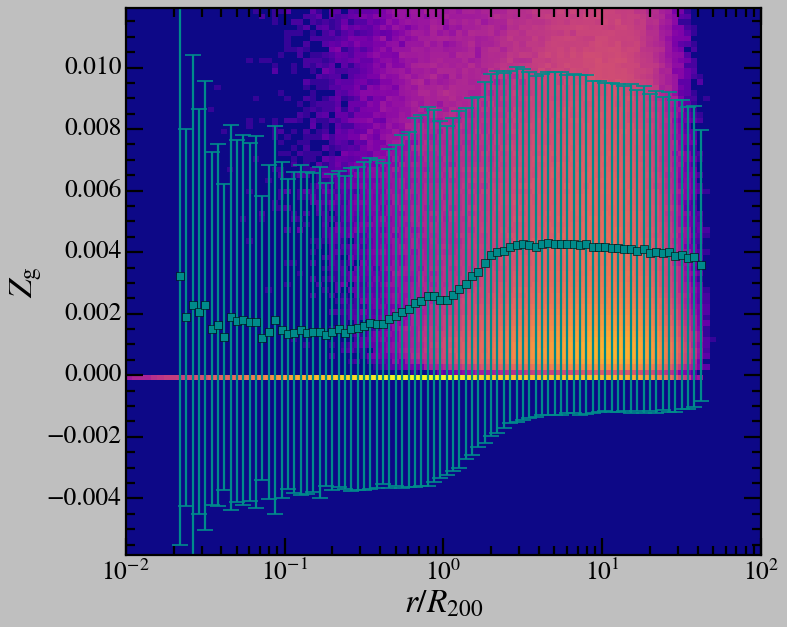

In [100]:
def gas_metalicity(galaxy_data):
    GasMetallicity = galaxy_data.SubhaloGasMetallicity

    return GasMetallicity

show_feature(gas_metalicity, r'$Z_{\rm{g}}$')

/var/folders/_n/k8j9__0s4x1b10rq7h7zj1bc0000gq/T/ipykernel_44875/456051516.py:13: RuntimeWarning: divide by zero encountered in log10
  feature_hist_log = np.log10(feature_hist)


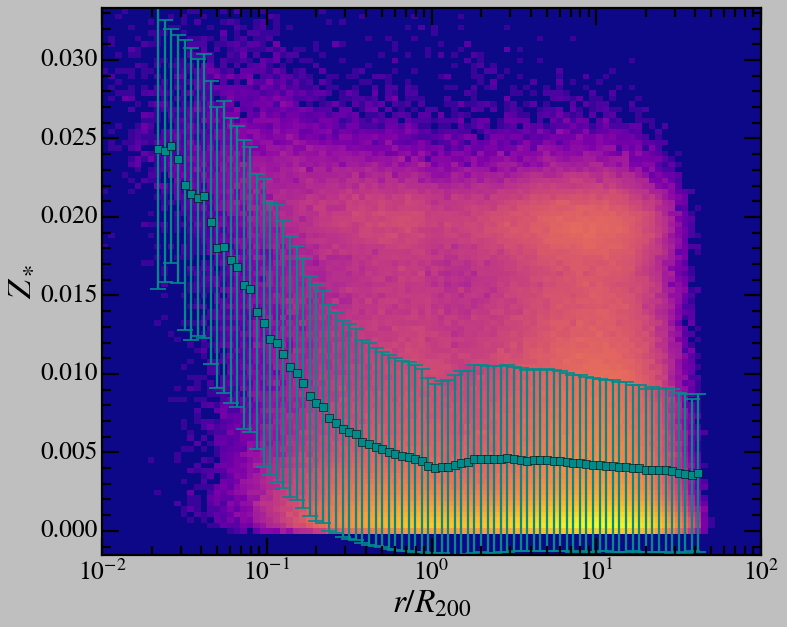

In [103]:
def star_metalicity(galaxy_data):
    StarMetallicity = galaxy_data.SubhaloStarMetallicity

    return StarMetallicity

show_feature(star_metalicity, r'$Z_\ast$')